# House Price Prediction - Advanced Regression  

#### Objective

US-based housing company named Surprise Housing has decided to enter the Australian market.They want to purchase properties in lesser price and sell them with a profit.The company has collected data set from the sale of houses in Australia.
With the available independant variables of the dataset, we are suposed to model the price of the house.

In [194]:
#import necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
#from sklearn import linear_model
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [195]:
# Import the dataset. Please change the path as per the requirement
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_3_Machine_Learning_2\train.csv")


In [196]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [197]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


#### Basic Checks on dataset

In [198]:
df.shape

(1460, 81)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [200]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


check for duplicate values in the dataset

In [201]:
sum(df.duplicated())

0

Bring the actual categorical elements back to the dataframe by their numeric value from the data dictionary

In [202]:
df['MSSubClass'] = df['MSSubClass'].map({ 20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [203]:
df['OverallQual'] = df['OverallQual'].map({ 1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',5:'Average',6:'Above Average',7:'Good',8:'Very Good',9:'Excellent',10:'Very Excellent'})

In [204]:
df['OverallCond'] = df['OverallCond'].map({1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',5:'Average',6:'Above Average',7:'Good',8:'Very Good',9:'Excellent',10:'Very Excellent'})

In [205]:
#get all the numeric column from the dataset
df_num = list(df.dtypes[df.dtypes !='O'].index)
len(df_num)

35

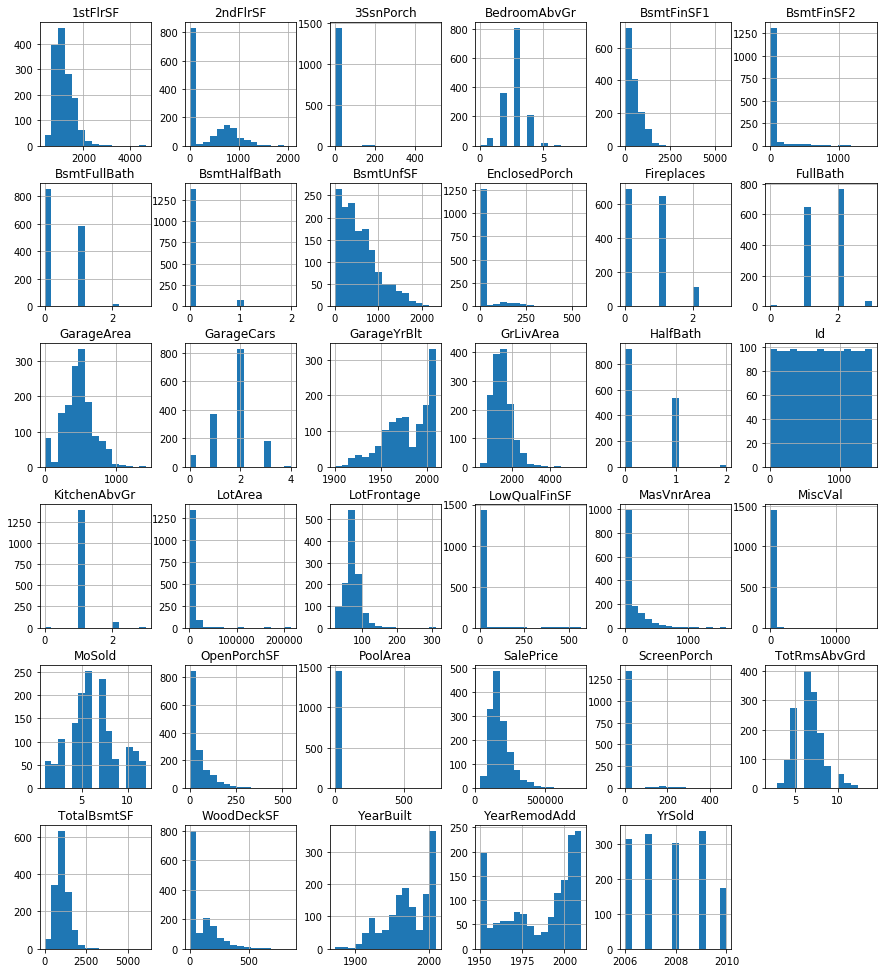

In [206]:
#distribution of numerical columns
df[df_num].hist(bins=15, figsize=(15,20), layout=(7, 6));

We can see that all the numerical variables are skewed. However, we will be taking care of this condition of the dataset later

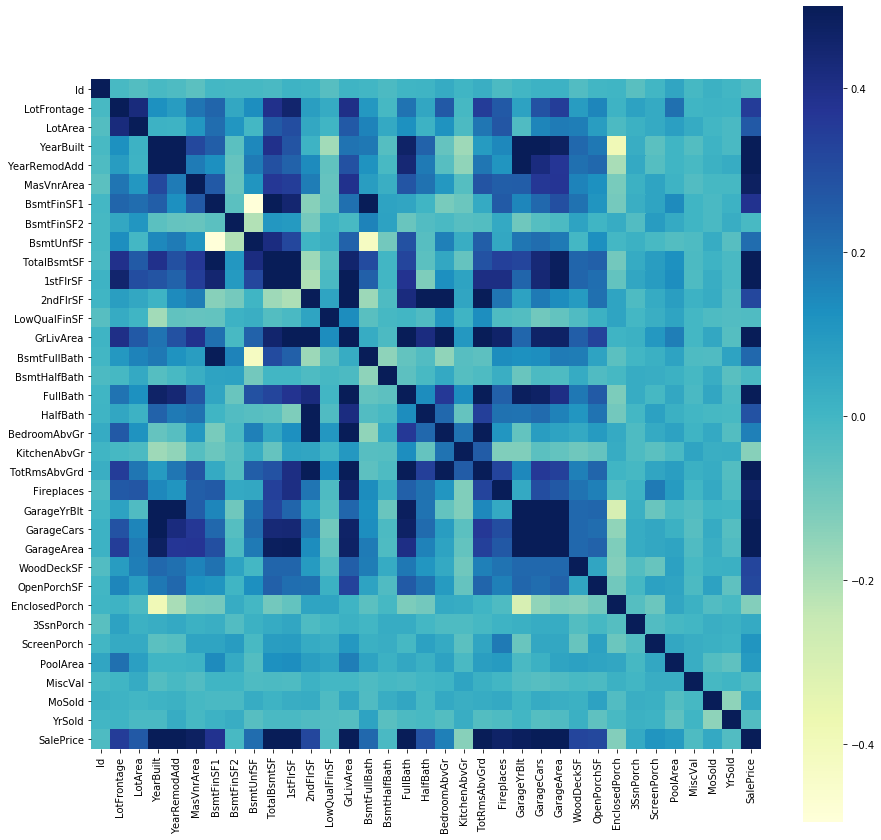

In [207]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.5,cmap="YlGnBu", square=True);

We can see that there are highly correlation is exit in the dataset

In [208]:
# find the highly correlated features
#a = df.corr().abs()
#b = a.where(np.triu(np.ones(a.shape), k=1).astype(np.bool))
#column_drop = [i for i in b.columns if any(b[i] > 0.80)]
#column_drop

In [209]:
# We can reomve the highly correlated columns from the dataset
#df.drop(column_drop,axis=1,inplace = True)

In [210]:
#Also remove those columns from the numeric list
#df_num.remove('1stFlrSF')
#df_num.remove('TotRmsAbvGrd')
#df_num.remove('GarageYrBlt')
#df_num.remove('GarageArea')

In [211]:
df.shape

(1460, 81)

In [212]:
#get all the categorical column from the dataset
df_cat = list(df.dtypes[df.dtypes =='O'].index)
len(df_cat)

46

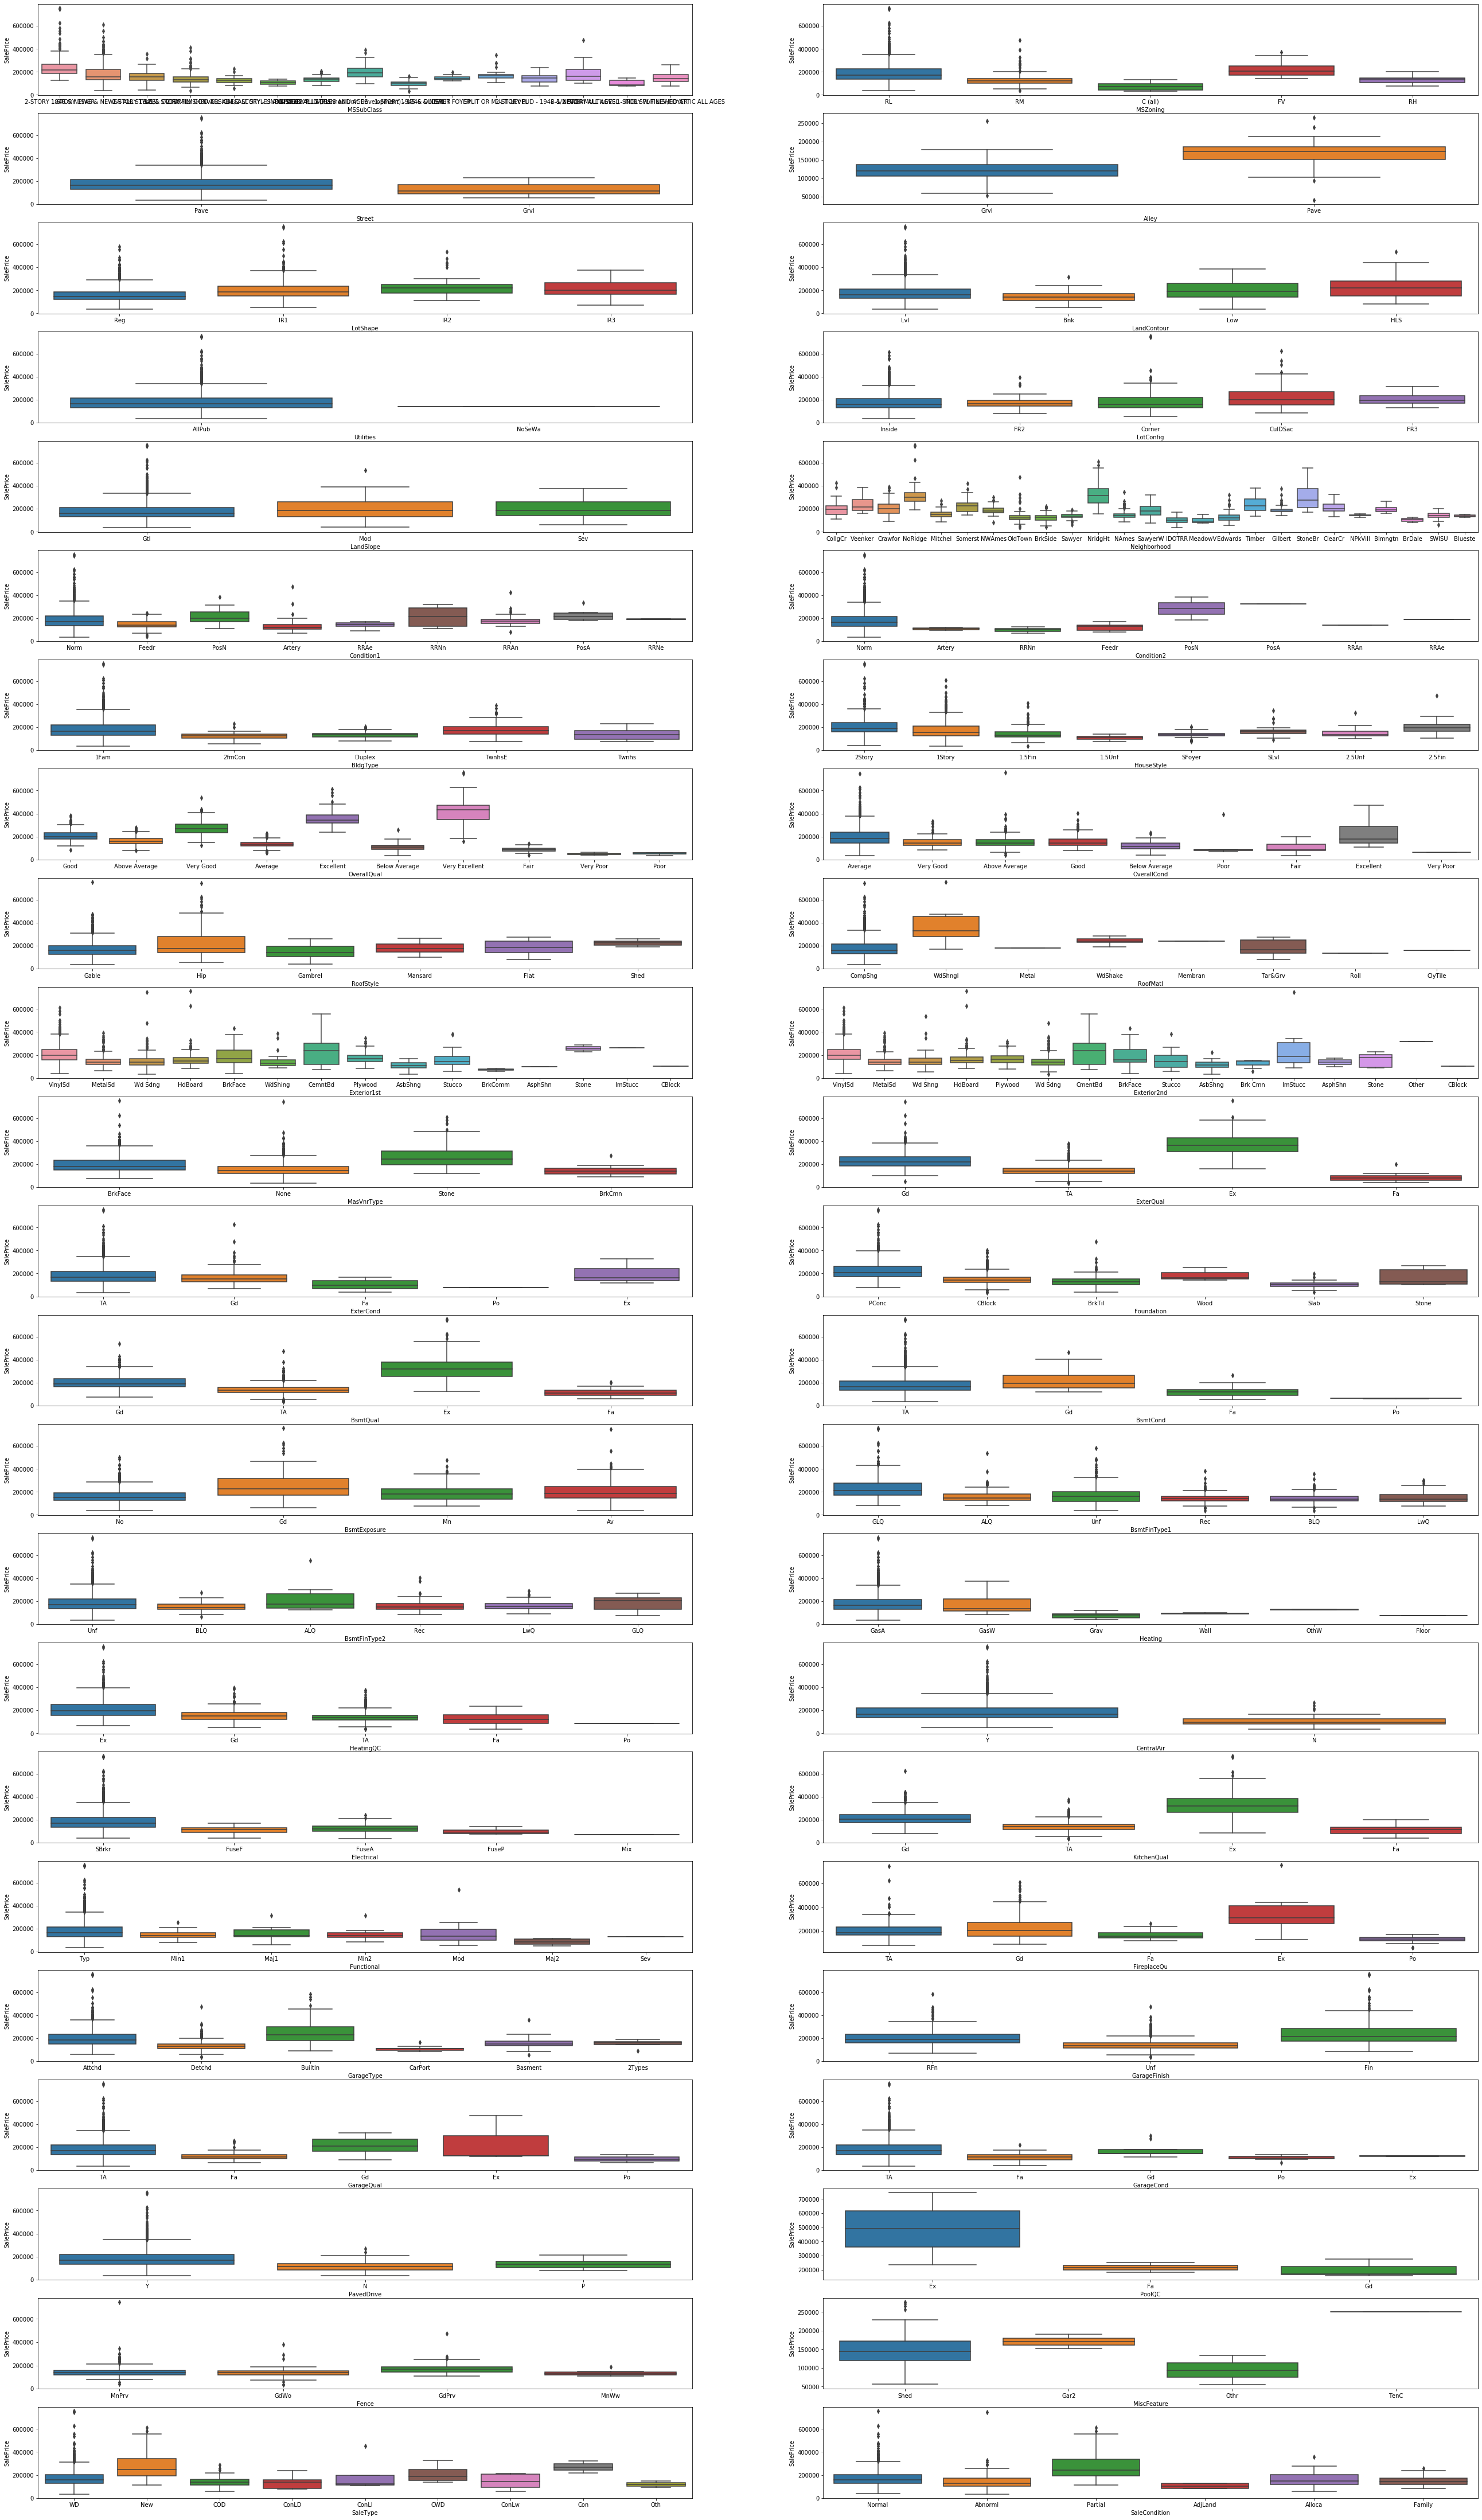

In [213]:
fig, ax = plt.subplots(23, 2, figsize=(45, 80))
for var, subplot in zip(df_cat, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)

#### Handling NA values: 
 - In the dataset, we have lot of NA values. From the data dictionary, we can find that they are not null values. Hene, we need to handle them properly so that they are not treated and counted as null.

In [214]:
df['Alley'].fillna('No Alley', inplace = True)
df['BsmtQual'].fillna('No Basement', inplace = True)
df['BsmtCond'].fillna('No Basement', inplace = True)
df['BsmtExposure'].fillna('No Basement', inplace = True)
df['BsmtFinType1'].fillna('No Basement', inplace = True)
df['BsmtFinType2'].fillna('No Basement', inplace = True)
df['MiscFeature'].fillna('None', inplace = True)
df['FireplaceQu'].fillna('No Fireplace', inplace = True)
df['GarageType'].fillna('No Garage', inplace = True)
df['GarageFinish'].fillna('No Garage', inplace = True)
df['GarageQual'].fillna('No Garage', inplace = True)
df['GarageCond'].fillna('No Garage', inplace = True)
df['PoolQC'].fillna('No Pool', inplace = True)
df['Fence'].fillna('No Fence', inplace = True)
df['MasVnrType'].fillna('None',inplace = True)

Cheking the null values

In [215]:
# % of null value in each column is:
c_df=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2))).reset_index().rename(columns={'index':'column_name',0:'percentage'}).sort_values('percentage',ascending=False)
c_df

,column_name,percentage
3,LotFrontage,17.74
59,GarageYrBlt,5.55
26,MasVnrArea,0.55
42,Electrical,0.07
52,KitchenAbvGr,0.00
58,GarageType,0.00
57,FireplaceQu,0.00
56,Fireplaces,0.00
55,Functional,0.00
54,TotRmsAbvGrd,0.00


In [216]:
# take a copy of the dataset
df1 = df.copy()

In [217]:
#Electrical - Electrical system
#Since for Electrical, number of missing value is very less we can remove the rows where electrical is empty
#before removing the rows:
df1.shape

(1460, 81)

In [218]:
df1 = df1[pd.notnull(df1['Electrical'])]
df1.shape

(1459, 81)

In [219]:
# Hence we have removed only 1 row. Or there were only one row where Electrical column had a null value

In [220]:
df1['MasVnrArea'].describe()

count    1451.00000
mean      103.75672
std       181.10815
min         0.00000
25%         0.00000
50%         0.00000
75%       166.00000
max      1600.00000
Name: MasVnrArea, dtype: float64

MasVnrArea has decent amount of missing value and can be replace with median

In [221]:
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1['MasVnrArea'].median())

similarly we can replace the missing value with median for GarageYrBlt

In [222]:
df1['GarageYrBlt']=df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median())

similarly we can replace the missing value with median for LotFrontage

In [223]:
df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].median())

In [224]:
# let us check the % of null value in each column again:
c_df1=pd.DataFrame((round(100*(df1.isnull().sum()/len(df1.index)), 2))).reset_index().rename(columns={'index':'column_name',0:'percentage'}).sort_values('percentage',ascending=False)
c_df1

,column_name,percentage
0,Id,0.0
41,CentralAir,0.0
59,GarageYrBlt,0.0
58,GarageType,0.0
57,FireplaceQu,0.0
56,Fireplaces,0.0
55,Functional,0.0
54,TotRmsAbvGrd,0.0
53,KitchenQual,0.0
52,KitchenAbvGr,0.0


### Check for the data imbalance 

In [225]:
for i in list(df1.columns):
    print(round(df1[i].value_counts()/len(df1.index) * 100, 2))

1460    0.07
479     0.07
481     0.07
482     0.07
483     0.07
484     0.07
485     0.07
486     0.07
487     0.07
488     0.07
489     0.07
490     0.07
491     0.07
492     0.07
493     0.07
494     0.07
495     0.07
496     0.07
497     0.07
498     0.07
499     0.07
480     0.07
478     0.07
501     0.07
477     0.07
458     0.07
459     0.07
460     0.07
461     0.07
462     0.07
        ... 
995     0.07
996     0.07
997     0.07
998     0.07
999     0.07
1000    0.07
1001    0.07
982     0.07
981     0.07
980     0.07
969     0.07
961     0.07
962     0.07
963     0.07
964     0.07
965     0.07
966     0.07
967     0.07
968     0.07
970     0.07
979     0.07
971     0.07
972     0.07
973     0.07
974     0.07
975     0.07
976     0.07
977     0.07
978     0.07
1       0.07
Name: Id, Length: 1459, dtype: float64
1-STORY 1946 & NEWER ALL STYLES                          36.74
2-STORY 1946 & NEWER                                     20.49
1-1/2 STORY FINISHED ALL AGES             

In [226]:
#The following columns have highly imbalanced data where one attribute contribute average 90% or more of the total column.
imb_list = ['Street','Alley','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl','ExterCond',
'BsmtCond','BsmtFinType2','BsmtFinSF2','Heating','CentralAir','Electrical','LowQualFinSF','BsmtHalfBath','KitchenAbvGr',
'Functional','GarageQual','GarageCond','PavedDrive','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC',
            'MiscFeature','MiscVal','SaleType']

#Hence, we an remove these columns from the dataset as they will not much helpful 

In [227]:
df1.drop(imb_list,axis=1,inplace = True)

In [228]:
df1.shape

(1459, 50)

In [229]:
# Drop the ID column
df1 = df1.drop('Id',axis=True)

Check for columns with unique values only

In [230]:
for i in df1.columns:
    if len(df1[i].value_counts())==1:
        print(i)      


there is no column with unique value

#### Derived Columns
 - Now, let us derive the age of the house, Age of the remodelling,and year sold from the year columns.

In [231]:
df1['bldg_age'] = int(datetime.datetime.now().year)-df1['YearBuilt']
df1['bldg_remodel_age'] = int(datetime.datetime.now().year)-df1['YearRemodAdd']
df1['garage_age'] = int(datetime.datetime.now().year)-df1['GarageYrBlt']
df1['yrSold_age'] = int(datetime.datetime.now().year)-df1['YrSold']

In [232]:
df1 = df1.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis = 1)

In [233]:
#get all the numeric column from the dataset again
df1_num = list(df1.dtypes[df1.dtypes !='O'].index)
len(df1_num)

25

In [234]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,bldg_age,bldg_remodel_age,garage_age,yrSold_age
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,RFn,2,548,0,61,No Fence,2,Normal,208500,17,17,17.0,12
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,No Fence,5,Normal,181500,44,44,44.0,13
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,No Fence,9,Normal,223500,19,18,19.0,12
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,No Fence,2,Abnorml,140000,105,50,22.0,14
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,No Fence,12,Normal,250000,20,20,20.0,12


### Outliers Analysis

In [235]:
df1_outlier = df1[df1_num]
df1_outlier.describe(percentiles = [.05, .25, .5, .75, .95])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,bldg_age,bldg_remodel_age,garage_age,yrSold_age
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,69.861549,10517.363948,103.187800,443.943797,567.366004,1057.891021,1162.906785,346.791638,1515.546950,0.425634,1.564770,0.382454,2.866347,6.517478,0.613434,1.766964,473.030158,94.240576,46.692255,6.322824,180930.394791,48.755997,35.149417,41.430432,12.184373
std,22.035077,9984.666267,180.773158,456.106417,441.992392,438.500975,386.572089,436.610637,525.650927,0.518969,0.550987,0.502798,0.816050,1.625902,0.644687,0.747546,213.869604,125.381679,66.267472,2.704331,79468.964025,30.199555,20.644343,23.993708,1.328542
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,10.000000,10.000000,10.000000,10.000000
5%,35.900000,3307.400000,0.000000,0.000000,0.000000,520.000000,672.900000,0.000000,848.000000,0.000000,1.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,88000.000000,13.000000,13.000000,13.000000,10.000000
25%,60.000000,7549.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,1129.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,333.000000,0.000000,0.000000,5.000000,129950.000000,20.000000,16.000000,19.000000,11.000000
50%,69.000000,9477.000000,0.000000,384.000000,479.000000,992.000000,1088.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,47.000000,26.000000,40.000000,12.000000
75%,79.000000,11603.000000,164.500000,712.500000,808.000000,1298.500000,1391.500000,728.000000,1777.500000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,66.000000,53.000000,58.000000,13.000000
95%,104.000000,17402.300000,456.000000,1274.000000,1468.000000,1753.000000,1831.500000,1141.100000,2466.200000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.200000,335.000000,175.100000,11.000000,326200.000000,104.000000,70.000000,90.000000,14.000000
max,313.000000,215245.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,755000.000000,148.000000,70.000000,120.000000,14.000000


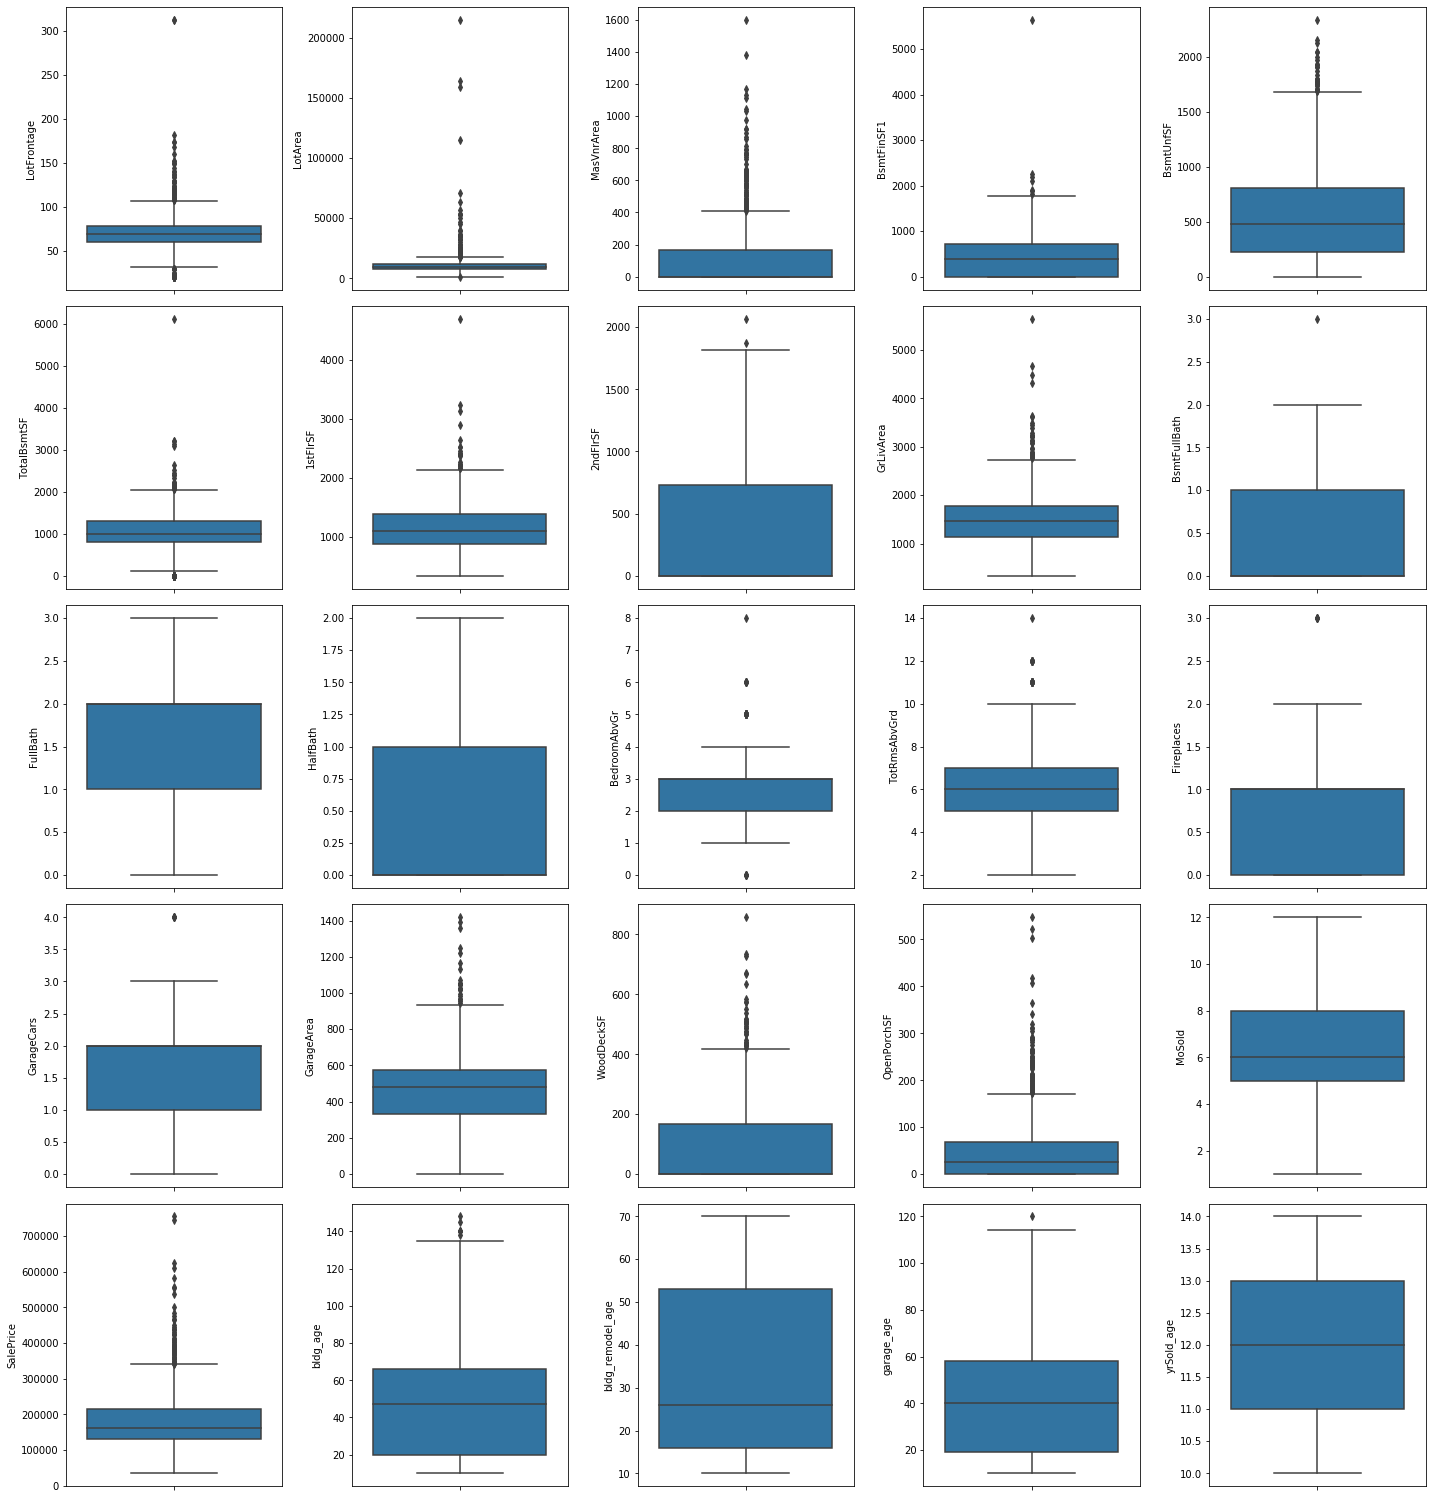

In [236]:
plt.figure(figsize=(20,25))

for i in range(len(df1_num)):
    
    plt.subplot(6, 5, i+1)
    sns.boxplot(y = df1_num[i], data = df1_outlier)

plt.tight_layout()
plt.show()

We can see that there are outlier present in the dataset.Hence, we need to remove the outliers and we can achieve it by IQR method

In [237]:
#Remove the outlier
for i in range(len(df1_num)):
    Q1 = df1[df1_num[i]].quantile(0.05)
    Q3 = df1[df1_num[i]].quantile(0.95)
    IQR = Q3 - Q1
    df1 = df1[(df1[df1_num[i]] >= Q1 - 1.5*IQR) & (df1[df1_num[i]] <= Q3 + 1.5*IQR)]

df1.shape

(1433, 49)

#### Target Variable - SalesPrice : 
 - we have already seen earlier that numeric columns are skewed. Now let us look into only the target column SalesPrice 

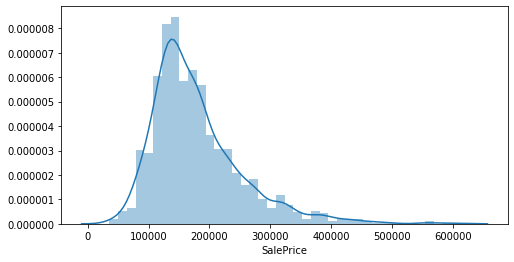

In [238]:
plt.figure(figsize=(8,4))
sns.distplot(df1['SalePrice'])
plt.show()

Since, the distribution of the data of Target variable is right skewed. We can try to make this proper by
using log tranformation

In [239]:
df1["TransformedPrice"] = np.log(df1["SalePrice"])

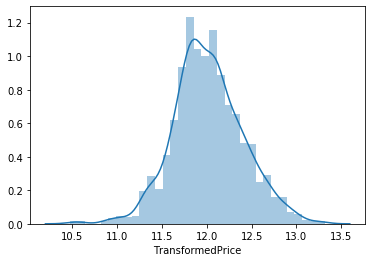

In [240]:
sns.distplot(df1['TransformedPrice'])
plt.show()

In [241]:
#Now, let us log transform all the numeric columns of the dataset
#for i in df1_num:
#    df1[i]=np.log1p(df1[i])

In [242]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,bldg_age,bldg_remodel_age,garage_age,yrSold_age,TransformedPrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,RFn,2,548,0,61,No Fence,2,Normal,208500,17,17,17.0,12,12.247694
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,No Fence,5,Normal,181500,44,44,44.0,13,12.109011
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,No Fence,9,Normal,223500,19,18,19.0,12,12.317167
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,No Fence,2,Abnorml,140000,105,50,22.0,14,11.849398
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,No Fence,12,Normal,250000,20,20,20.0,12,12.429216


#### Create Dummy Varible 

In [243]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,bldg_age,bldg_remodel_age,garage_age,yrSold_age,TransformedPrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,RFn,2,548,0,61,No Fence,2,Normal,208500,17,17,17.0,12,12.247694
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,No Fence,5,Normal,181500,44,44,44.0,13,12.109011
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,No Fence,9,Normal,223500,19,18,19.0,12,12.317167
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,No Fence,2,Abnorml,140000,105,50,22.0,14,11.849398
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,No Fence,12,Normal,250000,20,20,20.0,12,12.429216


In [244]:
#Create the list of categorical variables once again
df1_cat = []
for i in df1.columns:
    if df1[i].dtype =='object':
        df1_cat.append(i)

In [245]:
print(df1_cat)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition']


In [246]:
# #Get dummies of all categorical variables
dummy_df1 = pd.get_dummies(df1[df1_cat], drop_first=True)

In [247]:
#Concating the dataframe with dummies with the the original dataframe
df2 = pd.concat([df1, dummy_df1], axis=1)
df2.shape

(1433, 212)

In [248]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,bldg_age,bldg_remodel_age,garage_age,yrSold_age,TransformedPrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attc

In [249]:
#remove original variables:
df3 = df2.drop(df1_cat,axis=1)
df3.shape

(1433, 188)

In [250]:
df3.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,bldg_age,bldg_remodel_age,garage_age,yrSold_age,TransformedPrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,2,208500,17,17,17.0,12,12.247694,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,284,1262,1262

## Train - Test Split

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
# Store independant variables to X
X = df3.drop(['SalePrice','TransformedPrice'], axis = 1)
# Store dependant variable to y
y = df3['TransformedPrice'].values

In [253]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1003, 186)
X_test: (430, 186)
y_train: (1003,)
y_test: (430,)


## Feature Scaling

In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:
scaler = StandardScaler()

# Getting all the numerical columns
num_cols = list(X_train.dtypes[X_train.dtypes != 'object'].index)

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,bldg_age,bldg_remodel_age,garage_age,yrSold_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
597,-0.834308,-1.457987,-0.157217,-1.020988,1.545719,0.502310,0.673385,-0.794263,-0.200323,-0.825433,-2.916743,3.190274,-1.100267,0.325096,0.631461,1.637547,0.807066,0.230264,-0.477067,-1.594062,-1.151299,-1.078455,-1.144266,0.597718,-0.341945,-0.219242,-0.756373,3.895821,-0.063277,-0.138957,-0.100352,-0.192947,-0.517702,-0.19844,-0.203806,-0.083834,-0.110041,-0.19844,-0.19844,-0.110041,0.500623,-0.414402,-0.163132,-0.070781,0.766176,-0.247741,-0.19015,-0.044699,0.609994,-0.0315

In [256]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,bldg_age,bldg_remodel_age,garage_age,yrSold_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
58,-0.167608,1.004426,5.789687,-1.020988,1.887949,0.872185,0.738817,2.790543,3.033833,-0.825433,2.705602,1.211397,0.168202,2.231947,0.631461,1.637547,0.773936,0.833106,-0.737103,1.386076,-1.151299,-1.029951,-1.144266,1.348985,-0.341945,-0.219242,-0.756373,-0.256685,-0.063277,-0.138957,-0.100352,-0.192947,1.931614,-0.198440,-0.203806,-0.083834,-0.110041,-0.19844,-0.198440,-0.110041,0.500623,-0.414402,6.130002,-0.070781,-1.305184,4.036472,-0.190150,-0.044699,-1.639360,-0.031591,-0

## Model Building and Evaluation

 - First we build a model with Linear Regression using RFE. At this point, we use 50 random variable to be selected by RFE for the Linear Regression model

### Linear Regression

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [258]:
# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50) # selecting the 50 top features with RFE
rfe = rfe.fit(X_train, y_train)

In [259]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 87),
 ('BsmtFinSF1', False, 122),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 115),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 35),
 ('FullBath', False, 81),
 ('HalfBath', False, 78),
 ('BedroomAbvGr', False, 16),
 ('TotRmsAbvGrd', False, 100),
 ('Fireplaces', False, 53),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 29),
 ('OpenPorchSF', False, 14),
 ('MoSold', False, 135),
 ('bldg_age', True, 1),
 ('bldg_remodel_age', True, 1),
 ('garage_age', False, 86),
 ('yrSold_age', False, 76),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 106),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 41),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  False,
  105),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', False, 136),
 ('MSSubClass_2 FAMILY CONVERSIO

In [260]:
cols = X_train.columns[rfe.support_]

In [261]:
X_train_rfe = X_train[cols]

In [262]:
lm.fit(X_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
# prediction with Linear Regression model
y_train_pred = lm.predict(X_train_rfe)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9356744064069631

In [264]:
# Test set prediction with Linear Regression model
X_test_rfe = X_test[X_train_rfe.columns]
y_test_pred = lm.predict(X_test_rfe)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8799702447420829

With the help of RFE of 50 features, we get a good R2 score for Linear Regression. But we are not sure of that 50 features are good or not as it was selected  randomly. Now let us predict the housprice with Advanced Regression Technique or Ridge and Lasso Regression

### Advanced Regression

In regularized regression, we will be using K-Fold Cross-Validation for hyperparameter tuning.

In [265]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200,500]}

#### Ridge Regression

In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [267]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [268]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
26,0.003591,0.000474,0.000797,3.989495e-04,100,{'alpha': 100},-0.075479,-0.072081,-0.094659,-0.077066,-0.082504,-0.080358,0.007903,1,-0.066042,-0.066854,-0.062508,-0.066150,-0.063406,-0.064992,0.001708
27,0.004787,0.001466,0.001397,4.892603e-04,200,{'alpha': 200},-0.075409,-0.071943,-0.095532,-0.077507,-0.082296,-0.080537,0.008213,2,-0.068239,-0.068973,-0.064656,-0.068358,-0.066011,-0.067247,0.001640
25,0.003392,0.000489,0.000997,6.289914e-07,50,{'alpha': 50},-0.076408,-0.072447,-0.094197,-0.076877,-0.083440,-0.080674,0.007626,3,-0.064641,-0.065539,-0.061164,-0.065002,-0.061972,-0.063664,0.001754
24,0.004787,0.001596,0.000997,5.519789e-07,20,{'alpha': 20},-0.077631,-0.073409,-0.093797,-0.076650,-0.085197,-0.081337,0.007331,4,-0.063473,-0.064380,-0.060102,-0.064176,-0.060799,-0.062586,0.001783
23,0.005587,0.001016,0.001594,4.870128e-04,10,{'alpha': 10.0},-0.078137,-0.074156,-0.094000,-0.076761,-0.086080,-0.081827,0.007272,5,-0.062949,-0.063855,-0.059663,-0.063864,-0.060358,-0.062138,0.001782


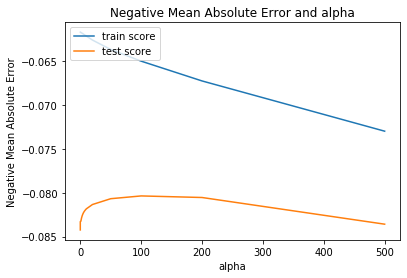

In [269]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [270]:
model_cv.best_params_

{'alpha': 100}

From k-fold cross validation we get the optimal value of alpha for ridge regression as 100. Hence we will build our Ridge Regression Model with alpha as 100

In [271]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.20183164e-02,  1.11574086e-02,  6.82631615e-03,  1.94196939e-02,
        9.35891043e-04,  3.89698985e-02,  2.80394710e-02,  2.88983879e-02,
        4.83101134e-02,  1.10431790e-02,  1.27066802e-02,  1.19829654e-02,
       -2.68757515e-03,  1.01670558e-02,  1.00027276e-02,  2.03211697e-02,
        1.84214035e-02,  8.44812575e-03,  9.60443101e-03,  6.33988291e-04,
       -3.13299388e-02, -1.64568905e-02, -6.13528301e-03,  3.85860115e-03,
        1.11537179e-03, -1.49244027e-02,  9.09040928e-03, -2.17684365e-03,
        8.42124965e-04, -7.22788695e-03,  3.04072536e-03,  8.40666222e-03,
        5.16588151e-03, -1.16442533e-02, -4.22814560e-03, -2.02435129e-03,
       -4.57633744e-03, -1.79498435e-03,  5.44706319e-03,  4.03962397e-03,
        1.27263637e-02, -7.95207790e-03,  6.38207469e-03,  4.19975559e-03,
        3.04585684e-03,  4.99137768e-03, -4.61522922e-03,  1.26858911e-03,
       -4.35372495e-03,  2.98170984e-03, -3.54976081e-03,  8.55106348e-03,
        4.48373260e-03, -

In [272]:
# Train set prediction with Ridge Regression model
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_pred))

0.9446400835976861


In [273]:
# Test set prediction with Ridge Regression model
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.875698281414097


In [274]:
len(ridge.coef_)

186

#### Overview from Ridge Regression:
 - With alpha 100,
  - Training set R2 is 94.46%
  - Test set R2 is 87.56%
  - Number of features 186

In [275]:
# Ridge Regression model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "const")
ridge_coeff = pd.DataFrame(list(zip(cols, model_parameters)))
ridge_coeff.columns = ['Features', 'Coefficients']
# Dropping the constant from the list of coefficients
ridge_coeff = ridge_coeff.drop(0)

Top 10 Ridge Model coefficients which contribute to an increase in the price of a house

In [276]:
top = ridge_coeff.sort_values(by = 'Coefficients', ascending = False).head(10)
top

,Features,Coefficients
9,GrLivArea,0.048
6,TotalBsmtSF,0.039
8,2ndFlrSF,0.029
88,OverallQual_Very Good,0.029
7,1stFlrSF,0.028
83,OverallQual_Excellent,0.026
186,SaleCondition_Partial,0.024
185,SaleCondition_Normal,0.020
16,GarageCars,0.020
4,BsmtFinSF1,0.019


Bottm 10 Ridge Model coefficients which contribute to a decrease in the price of a house


In [277]:
bottom = ridge_coeff.sort_values(by = 'Coefficients', ascending = True).head(10)
bottom

,Features,Coefficients
21,bldg_age,-0.031
84,OverallQual_Fair,-0.026
93,OverallCond_Fair,-0.020
91,OverallCond_Below Average,-0.018
163,KitchenQual_TA,-0.017
22,bldg_remodel_age,-0.016
26,MSSubClass_1-STORY 1945 & OLDER,-0.015
59,Neighborhood_MeadowV,-0.015
104,Exterior1st_BrkComm,-0.014
90,OverallCond_Average,-0.014


Plotting the top 10 and bottom 10 ridge model feature variables based on their importance

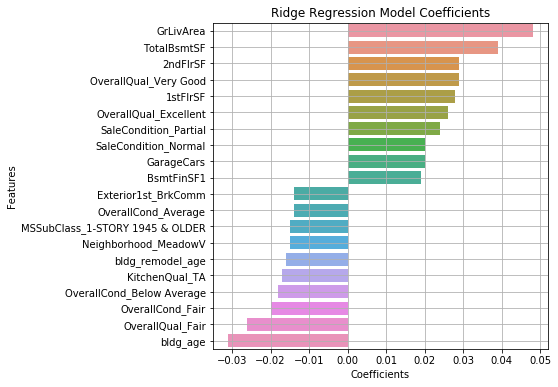

In [278]:
final_coef = pd.concat([top.head(10), bottom.sort_values(by = 'Coefficients', ascending = False)])
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.barplot(x = 'Coefficients', y = 'Features', data = final_coef)
plt.title("Ridge Regression Model Coefficients")
plt.grid()
plt.show()

The top 10 Ridge Regression Features are:

<b>
                  
    Feature Name               Description
    GrLivArea                  Above grade (ground) living area square feet
    TotalBsmtSF                Total square feet of basement area
    2ndFlrSF                   Second floor square feet
    OverallQual_Very Good      Rates the overall material and finish of the house - Very Good
    1stFlrSF                   First Floor square feet
    OverallQual_Excellent      Rates the overall material and finish of the house - Excellent
    SaleCondition_Partial      Condition of sale - Home was not completed when last assessed (associated with New Homes)
    SaleCondition_Normal       Condition of sale - Normal Sale
    GarageCars                 Size of garage in car capacity
    BsmtFinSF1                 Type 1 finished square feet
    
</b>

The bottom 10 Ridge Regression Features are:
<b>
    
     Feature Name                      Description
     bldg_age                         A derived column which calculate the age of the building at the current date
     OverallQual_Fair                 Rates the overall material and finish of the house - Fair
     OverallCond_Fair                 Rates the overall condition of the house - Fair
     OverallCond_Below Average        Rates the overall condition of the house - Below Average
     KitchenQual_TA                   Kitchen quality - Typical/Average
     bldg_remodel_age                 A derived column which calculate the age of the building remodel done at the current date
     MSSubClass_1-STORY 1945 & OLDER  Identifies the type of dwelling involved in the sale - 1-STORY 1945 & OLDER
     Neighborhood_MeadowV             Physical locations within Ames city limits - Meadow Village
     Exterior1st_BrkComm              Exterior covering on house - Brick Common
     OverallCond_Average              Rates the overall condition of the house - Average
</b>

However, with Ridge Regression, we cannot eliminate features. Hence, now let us perform Lasso Regression on the dataset

### Lasso Regression

In [279]:
from sklearn.linear_model import Lasso

In [280]:
lasso = Lasso()
# list of alphas

params = {'alpha': [0.00001, 0.0001, 0.001, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [281]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.001,-0.063686,-0.079319,1
1,0.0001,-0.061827,-0.082710,2
0,1e-05,-0.061702,-0.083871,3
3,0.01,-0.078806,-0.086525,4


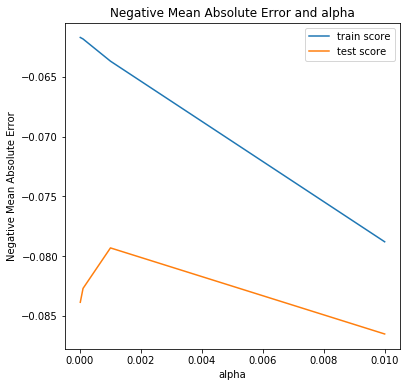

In [282]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [283]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

From k-fold cross validation we get the optimal value of alpha for lasso regression as 0.0001. Hence we will build our Lasso Regression Model with alpha as 0.001.

In [284]:
alpha =.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [285]:
lasso.coef_

array([ 1.18112674e-02,  1.00732026e-02,  3.60474433e-03,  1.50352262e-02,
       -8.55050380e-03,  5.61568563e-02,  0.00000000e+00,  1.74267201e-02,
        1.03508576e-01,  9.05112711e-03,  1.60589097e-03,  4.99785871e-03,
       -2.15107583e-03,  0.00000000e+00,  7.77123683e-03,  2.39356379e-02,
        1.30538964e-02,  7.30516123e-03,  7.30070640e-03,  0.00000000e+00,
       -6.42190409e-02, -1.59375224e-02, -0.00000000e+00,  2.41452812e-03,
        0.00000000e+00, -1.10706951e-02,  5.37089018e-03, -1.06496675e-03,
        0.00000000e+00, -4.27058256e-03,  3.62428839e-03,  7.52855397e-03,
        0.00000000e+00, -1.40414627e-02, -4.16769787e-03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  5.14334406e-03,  4.35050359e-03,
        1.26752330e-02, -7.80863344e-03,  5.73793181e-03,  3.59526001e-03,
        1.60850686e-03,  3.72377534e-03, -2.34165104e-03,  1.35131907e-03,
       -4.05366315e-03,  2.08745344e-03, -1.77834717e-03,  1.00189168e-02,
        1.35108753e-03, -

In [286]:
# Train set prediction with Lasso Regression model
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_pred))

0.9457583244331177


In [287]:
# Test set prediction with Lasso Regression model
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8805474079966292


In [288]:
len(lasso.coef_[lasso.coef_ != 0])

139

#### Overview from Lasso Regression:
 - With alpha .001,
  - Training set R2 is 94.57%
  - Test set R2 is 88.05%
  - Number of features 139

In [289]:
# Lasso Regression model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "const")
lasso_coeff = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coeff.columns = ['Features', 'Coefficients']

In [290]:
# Dropping the constant from the list of coefficients
lasso_coeff = lasso_coeff.drop(0)

Top 10 Lasso Model coefficients which contribute to an increase in the price of a house

In [291]:
top = lasso_coeff.sort_values(by = 'Coefficients', ascending = False).head(10)
top

,Features,Coefficients
9,GrLivArea,0.104
6,TotalBsmtSF,0.056
88,OverallQual_Very Good,0.036
83,OverallQual_Excellent,0.032
186,SaleCondition_Partial,0.029
16,GarageCars,0.024
185,SaleCondition_Normal,0.023
85,OverallQual_Good,0.020
55,Neighborhood_Crawfor,0.020
87,OverallQual_Very Excellent,0.018


Bottom 10 Lasso Model coefficients which contribute to an increase in the price of a house

In [292]:
bottom = lasso_coeff.sort_values(by = 'Coefficients', ascending = True).head(10)
bottom

,Features,Coefficients
21,bldg_age,-0.064
84,OverallQual_Fair,-0.025
93,OverallCond_Fair,-0.022
163,KitchenQual_TA,-0.021
90,OverallCond_Average,-0.020
91,OverallCond_Below Average,-0.020
162,KitchenQual_Gd,-0.018
174,GarageType_No Garage,-0.017
22,bldg_remodel_age,-0.016
81,OverallQual_Average,-0.014


Plotting the top 10 and bottom 10 lasso model feature variables based on their importance

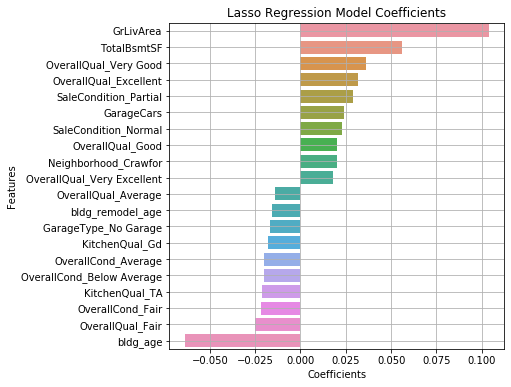

In [293]:
final_coef = pd.concat([top.head(10), bottom.sort_values(by = 'Coefficients', ascending = False)])
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.barplot(x = 'Coefficients', y = 'Features', data = final_coef)
plt.title("Lasso Regression Model Coefficients")
plt.grid()
plt.show()

 The top 10 Lasso Regression Features are:

<b>
     
    Feature Name               Description
    GrLivArea                  Above grade (ground) living area square feet
    TotalBsmtSF                Total square feet of basement area
    OverallQual_Very Good      Rates the overall material and finish of the house - Very Good
    OverallQual_Excellent      Rates the overall material and finish of the house - Excellent 
    SaleCondition_Partial	   Condition of sale - Home was not completed when last assessed (associated with New Homes)
    GarageCars	               Size of garage in car capacity
 	SaleCondition_Normal	   Condition of sale - Normal Sale
	OverallQual_Good	       Rates the overall material and finish of the house - Very Good
    Neighborhood_Crawfor	   Physical locations within Ames city limits
    OverallQual_Very Excellent Rates the overall material and finish of the house - Very Excellent
    
</b>

The bottom 10 Lasso Regression Features are:
<b>
    
     Feature Name                     Description
     bldg_age	                      A derived column which calculate the age of the building at the current date
     OverallQual_Fair	              Rates the overall material and finish of the house - Fair
     OverallCond_Fair	              Rates the overall condition of the house - Fair
     KitchenQual_TA	                  Kitchen quality - Typical/Average
     OverallCond_Average	          Rates the overall condition of the house - Average
     OverallCond_Below Average	      Rates the overall condition of the house - Below Average
     KitchenQual_Gd	                  Kitchen quality - Good
     GarageType_No Garage	          Garage location - No Garage
     bldg_remodel_age	              A derived column which calculate the age of the building remodel done at the current date
     OverallQual_Average	          Rates the overall condition of the house - Average
</b>

### Conclusion & Recommendation
---------------------------------------------------------------------   
    The accuracy for Linear, Ridge & Lasso Regression are good. However, a predictive model has to be simple and regularization technique helps to create an optimally complex model which performs more intuitively in business scenario. Hence we will be continuing with Lasso Regression producing a simple and robust model which able to draw a high accuracy score on the unseen data
    
    The top 10 features which Lasso Regression produce, are the points which can be aimed to gain more profit from the business. These are the qualities of a house which should be profitable to do business with.Similarly,the bottom 10 features are the qualities which should be notted while doing business/considering inclusion of a property in the business as those are the features which are more likely to be come out as loss maker.
    
----------------------------------------------------------------------
